In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

Using cache found in C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-1-30 Python-3.12.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


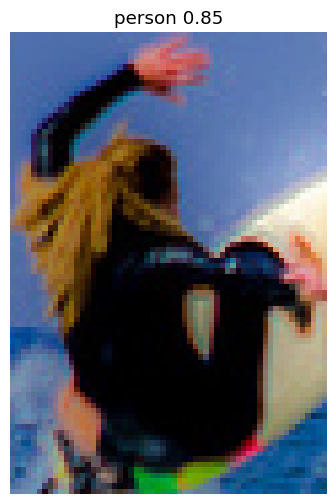

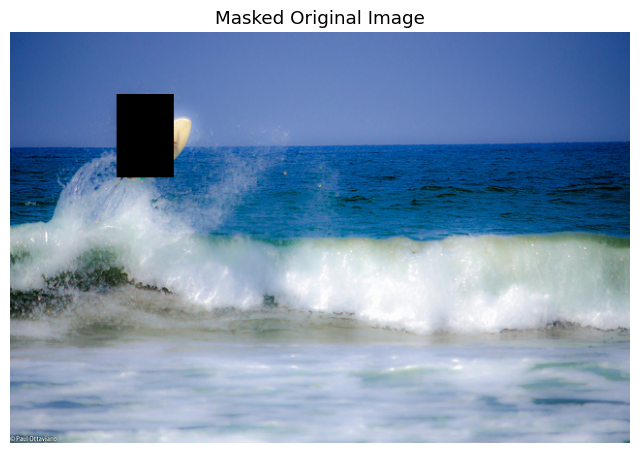

C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


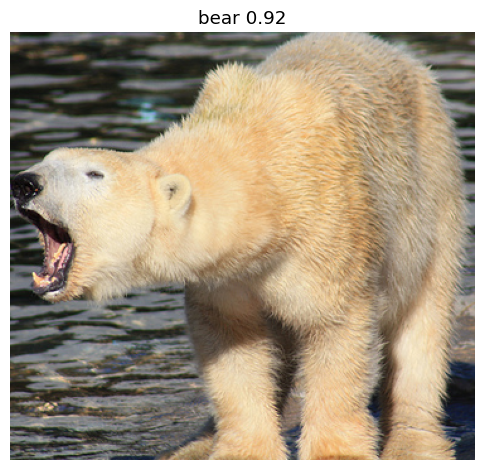

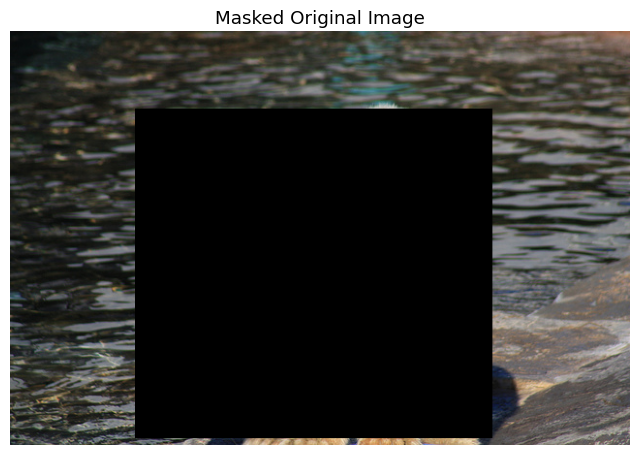

Object Image 1: Channels = 3, Height = 86, Width = 59
Object Image 2: Channels = 3, Height = 340, Width = 369


In [13]:
%matplotlib inline

# YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# COCO
image_dir = 'C:/Users/82107/unlabeled2017'
image_files = os.listdir(image_dir)

# 2개의 이미지 처리
num_images = min(2, len(image_files))

# 객체 이미지를 저장할 리스트
x = []

for idx in range(num_images):
    
    image_path = os.path.join(image_dir, image_files[idx])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Object Detection
    results = model(image_rgb)

    # 객체 정보 추출
    detections = results.xyxy[0]

    # 원본 이미지 복사
    masked_image = image.copy()

    # 첫 번째 객체만 추출
    if len(detections) > 0:
        x1, y1, x2, y2, conf, cls = detections[0]  # 첫 번째 객체 정보
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        label = f'{model.names[int(cls)]} {conf:.2f}'
        
        # 객체를 추출하여 리스트에 저장
        object_image = image[y1:y2, x1:x2]
        x.append(object_image)  # 객체 이미지 추가

        # 원본 이미지에서 객체 영역을 검은색으로 변경
        masked_image[y1:y2, x1:x2] = [0, 0, 0]

        # 추출된 객체 이미지 출력
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
        plt.show()

    # 마스크된 원본 이미지 출력
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title('Masked Original Image')
    plt.axis('off')
    plt.show()

# 추출된 객체 이미지 정보
for i, obj_img in enumerate(x):
    channels, height, width = obj_img.shape[2], obj_img.shape[0], obj_img.shape[1]
    print(f'Object Image {i + 1}: Channels = {channels}, Height = {height}, Width = {width}')

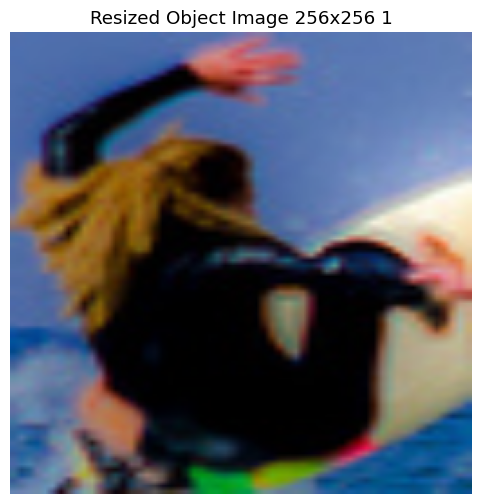

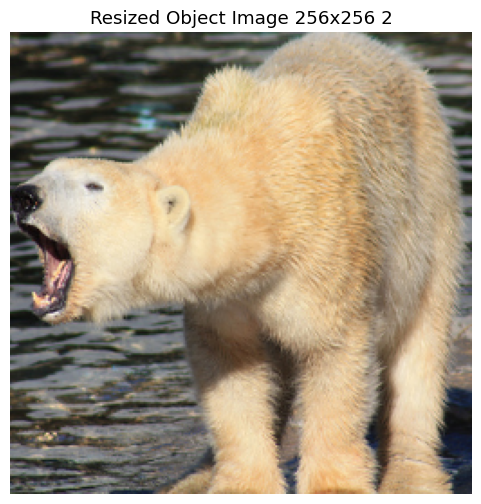

In [15]:
# 리사이즈된 이미지를 저장할 리스트
resized_images = []

# 추출된 객체 이미지를 리사이즈하고 출력
for i, obj_img in enumerate(x):
    # 이미지 리사이즈
    resized_image = cv2.resize(obj_img, (256, 256), interpolation=cv2.INTER_LINEAR)
    resized_images.append(resized_image)  # 리사이즈된 이미지 추가

    # 리사이즈된 이미지 출력
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Resized Object Image 256x256 {i + 1}')
    plt.axis('off')
    plt.show()